In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from typing import List
import math

# Image generation

Generates image based on the formula: <br>
$B_{x,y} = B_{mid}+(B_{max}-B_{min})*cos(2*\pi*(\epsilon+\frac{(X- X_{mid})^2+(Y-Y_{mid})^2}{R_{d}}))$ <br>



In [25]:
PURE_IMAGES_PATH =  r"..\data\generated\pure"
NOISY_IMAGES_PATH = r"..\data\generated\noisy"

In [26]:
class ImageGenerator:
    def __init__(self, 
                 width: int=640, 
                 height: int=480
                 ) -> None:
        """Class for generating images (artificial data for model training)

        Args:
            width (int, optional): Width of the generated image. Defaults to 640.
            height (int, optional): Height of the generated image. Defaults to 480.
        """
        self.width = width
        self.height = height
        self.diff_between_rings = width*width / 6.07 # why 6.07 instead of 6.0
        
    def compute_single_pixel(self, x: int, y: int, epsilon: float, width_center: int, height_center: int, diff_brightness: float) -> float:
        """Compute color of single pixel at point (x, y).

        Args:
            x (int): pixel position w.r.t x-axis
            y (int): pixel position w.r.t y-axis
            epsilon (float): epsilon value in range (0,1)
            width_center (int): horizontal position of image center
            height_center (int): vertical position of image center
            mean_brightness (float): mean of pixels brightness
            diff_brightness (float): difference between maximal brightness and mean brightness

        Returns:
            float: single value representing color in grayscale
        """
        # why nominator in the equation is multiplied by 2
        # why 
        value = (diff_brightness * math.cos(2*math.pi*(epsilon + ((pow((x - width_center)*2, 2) + pow((y - height_center)*2, 2)) / self.diff_between_rings ))))
        return value
        
    def generate_pure_image(self, 
                            epsilon: float,
                            width_center: int = 320,
                            height_center: int = 240,
                            min_brightness: int = 40,
                            max_brightness: int = 210) -> np.array:
        """Generate pure image

        Args:
            epsilon (float): epsilon value in range(0,1)
            width_center (int, optional): horizontal position of image center. Defaults to 320.
            height_center (int, optional): vertical position of image center. Defaults to 240.
            min_brightness (int, optional): Minimal image brightness. Defaults to 40.
            max_brightness (int, optional): Maximal image brightness. Defaults to 210.

        Returns:
            np.array: 2D matrix which represents image.
        """
        mean_brightness = (min_brightness + max_brightness) / 2
        diff_brightness = max_brightness - mean_brightness
        
        img=np.ones((self.height,self.width))
        img=img[:,:] * mean_brightness
        for x in range (self.width):
            for y in range(self.height):
                img[y,x]=img[y,x]+self.compute_single_pixel(x, y, epsilon, width_center, height_center, diff_brightness)
        img=img.astype(np.uint8)
        return img
    
    def generate_noise(self):
        pass
    
    
    def generate_noisy_image(self, epsilon: float) -> np.array:
        pass
    
    def save2png(self, img: np.array, filename: str, path: str = PURE_IMAGES_PATH) -> None:
        """Save image to png file

        Args:
            img (np.array): 2D matrix which represents image.
            path (str): path to directory where file has to be saved
            filename (str): name of the file
        """
        img = Image.fromarray(img)
        img.save(path+"\\"+filename)

In [27]:
generator = ImageGenerator()

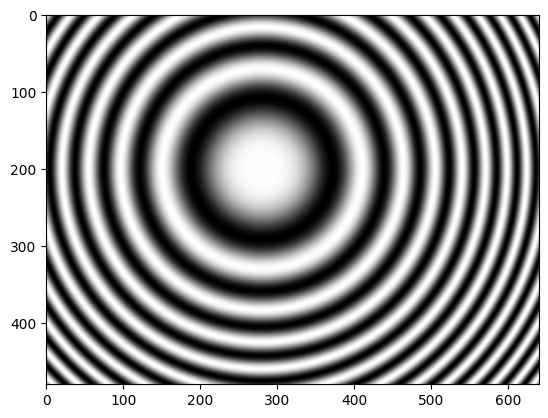

In [31]:
img = generator.generate_pure_image(1.0, 280, 200)
plt.imshow(img, cmap='gray')

In [32]:
generator.save2png(img, "2-pure.png")